In [169]:
import osmnx as ox
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle
import pandas as pd
import geopandas as gpd


import warnings
warnings.filterwarnings('ignore')

graph_filepath = "../data/iowa.graphml"
towns_cleaned_filepath = "../data/towns_cleaned.pkl"
states_shp_filepath = "../data/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp"
states_map = gpd.read_file(states_shp_filepath)
iowa_map = states_map[states_map.name == 'Iowa']

past_routes = pd.read_csv('../data/past_routes.csv')

with open(towns_cleaned_filepath, "rb") as f:
    towns = pickle.load(f)

## Count Occurances
Look at the number of occurances each town has for a given day

In [170]:
town_columns = ['Starting Town', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Ending Town']
occurrences = {col: {} for col in town_columns}

def count_occurrences(value, col):
    if value in occurrences[col]:
        occurrences[col][value] += 1
    else:
        occurrences[col][value] = 1
    return occurrences[col][value]

for col in town_columns:
    past_routes[col + ' Occurrences'] = past_routes[col].apply(lambda x: count_occurrences(x, col))

past_routes

,Unnamed: 0,Year,#,Miles,Feet of Climb,Riders,Starting Town,Sunday,Monday,Tuesday,...,Friday,Ending Town,Starting Town Occurrences,Sunday Occurrences,Monday Occurrences,Tuesday Occurrences,Wednesday Occurrences,Thursday Occurrences,Friday Occurrences,Ending Town Occurrences
0,0,1973,I,412,"12,637",130,Sioux City,Storm Lake,Fort Dodge,Ames,...,Davenport,'',1,1,1,1,1,1,1,1
1,1,1974,II,422,"12,648","2,000",Council Bluffs,Atlantic,Guthrie Center,Camp Dodge,...,Monticello,Dubuque,1,1,1,1,1,1,1,1
2,2,1975,III,450,"12,573","3,000",Hawarden,Cherokee,Lake View,Boone,...,Mt. Pleasant,Fort Madison,1,1,1,1,1,1,1,1
3,3,1976,IV,430,"13,737","4,000",Sidney,Red Oak,Harlan,Jefferson,...,Iowa City,Muscatine,1,1,1,1,1,1,1,1
4,4,1977,V,400,"8,479","6,000",Onawa,Ida Grove,Laurens,Algona,...,Decorah,Lansing,1,1,1,1,1,1,1,1
5,5,1978,VI,440,"11,238","6,000",Sioux City,Storm Lake,Humboldt,Iowa Falls,...,Maquoketa,Clinton,2,2,1,1,1,1,1,1
6,6,1979,VII,480,"11,836","6,000",Rock Rapids,Spencer,Rockwell City,Story City,...,Wapello,Burlington,1,1,1,1,1,1,1,1
7,7,1980,VIII,468,"11,912","6,000",Glenwood,Atlantic,Carroll,Perry,...,Elkader,Guttenberg,1,2,1,1,1,1,1,1
8,8,1981,IX,490,"14,372","6,000",Missouri Valley,Mapleton,Lake City,Greenfield,...,Keosauqua,Keokuk,1,1,1,1,1,1,1,1
9,9,1982,X,523,"10,935","6,000",Akron,Cherokee,Estherville,Forest City,...,Tipton,Davenport,1,2,1,1,1,1,1,1


In [171]:
def print_first_occurance_stats(n_years):
    for col in town_columns:
        recent_years = past_routes[col + ' Occurrences'].iloc[-n_years:].to_numpy()
        first_counts = len(recent_years[recent_years == 1])
        print(f'{first_counts} of the last {n_years} years have been first occurances on {col}')

print_first_occurance_stats(n_years=10)
print()
print_first_occurance_stats(n_years=15)

2 of the last 10 years have been first occurances on Starting Town
2 of the last 10 years have been first occurances on Sunday
1 of the last 10 years have been first occurances on Monday
4 of the last 10 years have been first occurances on Tuesday
2 of the last 10 years have been first occurances on Wednesday
3 of the last 10 years have been first occurances on Thursday
5 of the last 10 years have been first occurances on Friday
0 of the last 10 years have been first occurances on Ending Town

2 of the last 15 years have been first occurances on Starting Town
2 of the last 15 years have been first occurances on Sunday
2 of the last 15 years have been first occurances on Monday
6 of the last 15 years have been first occurances on Tuesday
3 of the last 15 years have been first occurances on Wednesday
3 of the last 15 years have been first occurances on Thursday
5 of the last 15 years have been first occurances on Friday
0 of the last 15 years have been first occurances on Ending Town


In [172]:
# Number of unique cities per day
for col in town_columns:
    print(past_routes[col].nunique(), col)

14 Starting Town
16 Sunday
24 Monday
29 Tuesday
30 Wednesday
29 Thursday
23 Friday
13 Ending Town


One possible starting town: Sioux Center	8,543   Northern Iowa

In [174]:
current_year = past_routes['Year'].max()

def calculate_years_since_visited(town):
    year_last_visited = past_routes[past_routes['Starting Town'] == town].iloc[-1]['Year']
    return current_year - year_last_visited

start_frequency = past_routes['Starting Town'].value_counts().reset_index()
start_frequency['years_since_visited'] = start_frequency['Starting Town'].apply(calculate_years_since_visited)
start_frequency

,Starting Town,count,years_since_visited
0,Sioux City,8,1
1,Glenwood,8,0
2,Council Bluffs,7,5
3,Onawa,6,6
4,Missouri Valley,4,16
5,Sioux Center,4,12
6,Hawarden,3,26
7,Rock Rapids,3,17
8,Le Mars,2,3
9,Sergeant Bluff,2,2


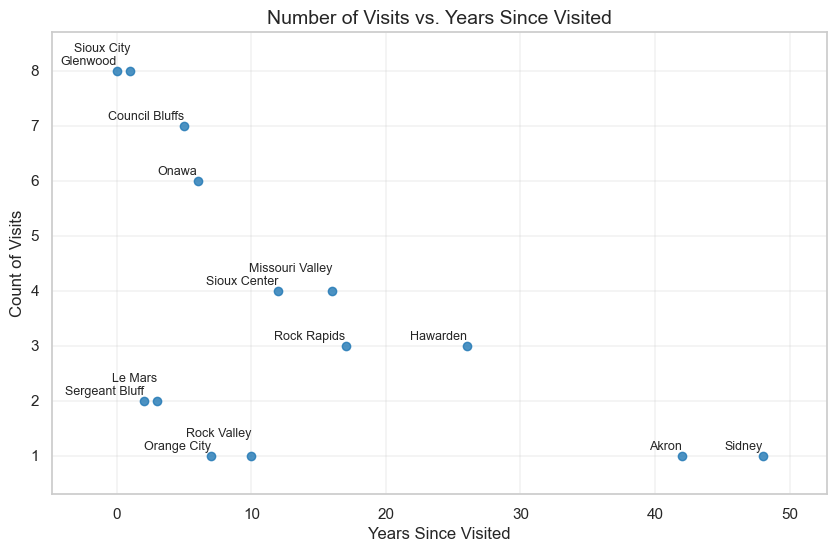

In [175]:
plt.figure(figsize=(10, 6))
plt.scatter(start_frequency['years_since_visited'], start_frequency['count'], alpha=0.8, color='tab:blue')

# Calculate limits to add padding 
x_min, x_max = start_frequency['years_since_visited'].min(), start_frequency['years_since_visited'].max()
y_min, y_max = start_frequency['count'].min(), start_frequency['count'].max()
x_padding = (x_max - x_min) * 0.1
y_padding = (y_max - y_min) * 0.1
plt.xlim(x_min - x_padding, x_max + x_padding)
plt.ylim(y_min - y_padding, y_max + y_padding)

for i, town in enumerate(start_frequency['Starting Town']):
    y_buffer = 0.1 if town not in ['Missouri Valley', 'Rock Valley', 'Le Mars', 'Sioux City'] else 0.35
    plt.text(start_frequency['years_since_visited'][i], start_frequency['count'][i]+y_buffer, town, fontsize=9, ha='right')

plt.title('Number of Visits vs. Years Since Visited', fontsize=14)
plt.xlabel('Years Since Visited')
plt.ylabel('Count of Visits')
plt.grid(True, linewidth=.3)
plt.show()

In [176]:
def calculate_years_since_visited(town):
    year_last_visited = past_routes[past_routes['Ending Town'] == town].iloc[-1]['Year']
    return current_year - year_last_visited

end_frequency = past_routes['Ending Town'].value_counts().reset_index()
end_frequency['years_since_visited'] = end_frequency['Ending Town'].apply(calculate_years_since_visited)
end_frequency

,Ending Town,count,years_since_visited
0,Muscatine,6,8
1,Clinton,6,3
2,Burlington,6,0
3,Fort Madison,5,11
4,Guttenberg,5,10
5,Davenport,5,1
6,Bellevue,5,17
7,Dubuque,4,14
8,Lansing,3,2
9,Keokuk,3,5


## Years Since Last Traveled
Starting / Ending towns are typically revisited every 8-9 years. Wednesday / Thursday have the most variation

Median = 8.0


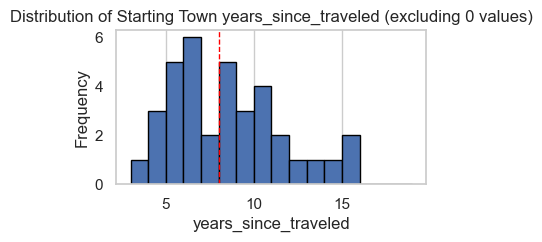

Median = 10.0


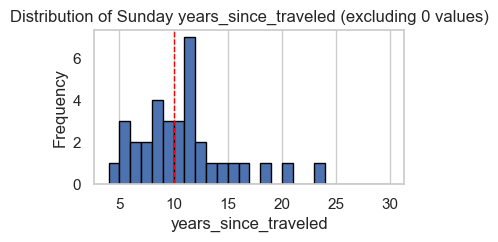

Median = 11.0


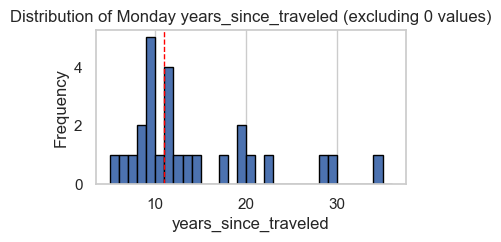

Median = 11.5


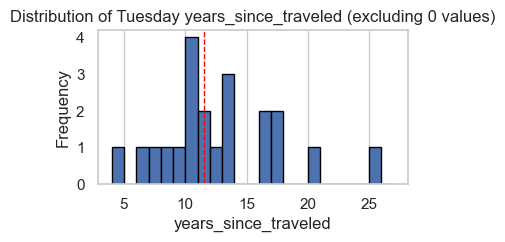

Median = 12.0


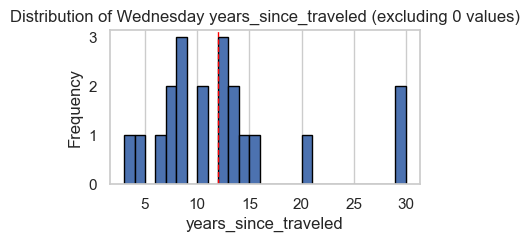

Median = 11.5


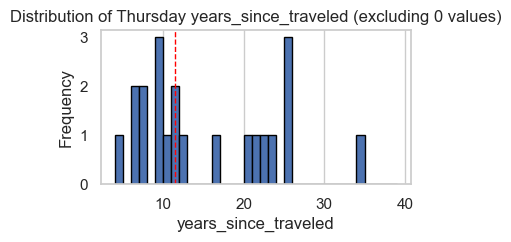

Median = 10.0


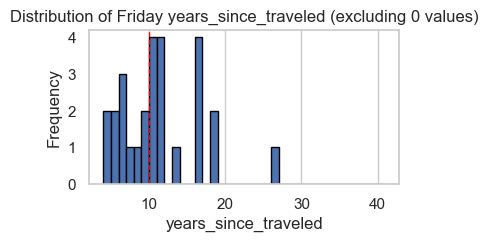

Median = 9.0


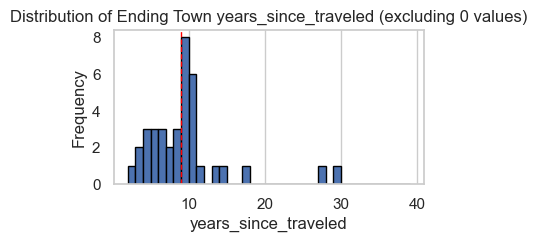

In [177]:
last_seen = {col: {} for col in town_columns}

def calculate_years_since_traveled(row, col):
    value = row[col]
    current_index = row.name
    if value in last_seen[col]:
        years = current_index - last_seen[col][value]
    else:
        years = 0
    last_seen[col][value] = current_index
    return years

# Apply the function to each specified column
for col in town_columns:
    past_routes[col + ' years_since_traveled'] = past_routes.apply(calculate_years_since_traveled, col=col, axis=1)


for col in town_columns:
    distance_col = col + ' years_since_traveled'
    non_zero_distances = past_routes[past_routes[distance_col] != 0][distance_col]
    plt.figure(figsize=(4, 2))
    # plt.hist(non_zero_distances, bins=range(1, non_zero_distances.max() + 2), edgecolor='black')
    plt.hist(non_zero_distances, bins=range(non_zero_distances.min(), non_zero_distances.max()), edgecolor='black')
    median_distance = non_zero_distances.median()
    plt.axvline(median_distance, color='red', linestyle='dashed', linewidth=1)
    print(f"Median = {median_distance}")
    # plt.text(median_distance, plt.ylim()[1] * 0.9, f'Median: {median_distance}', color='red', ha='center')
    plt.title(f'Distribution of {distance_col} (excluding 0 values)')
    plt.xlabel('years_since_traveled')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

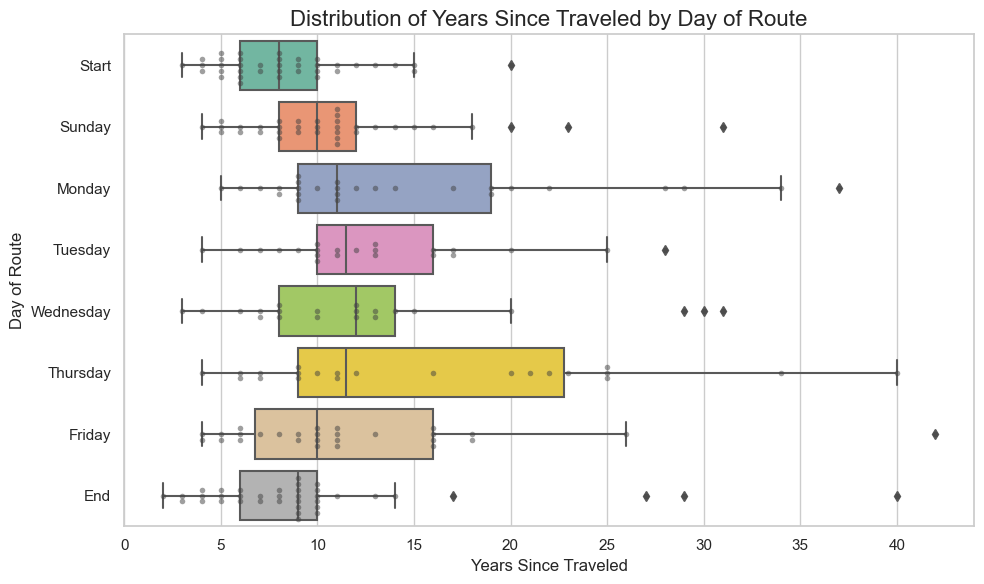

In [210]:
renamed_df = past_routes.rename(columns={'Starting Town years_since_traveled': 'Start years_since_traveled', 
                                         'Ending Town years_since_traveled': 'End years_since_traveled'})
days = [
    'Start',
    'Sunday',
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'End'
]

# Melt the DataFrame to long format
melted_df = renamed_df.melt(
    id_vars=[],
    value_vars=[col + ' years_since_traveled' for col in days],
    var_name='Day',
    value_name='Years_Since_Traveled'
)
melted_df['Day'] = melted_df['Day'].str.replace(' years_since_traveled', '')
melted_df = melted_df[melted_df['Years_Since_Traveled'] != 0]
melted_df = melted_df.dropna(subset=['Years_Since_Traveled'])
melted_df['Years_Since_Traveled'] = melted_df['Years_Since_Traveled'].astype(int)

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Years_Since_Traveled',
    y='Day',
    data=melted_df,
    palette='Set2',
    orient='h'
)
sns.swarmplot(
    x='Years_Since_Traveled',
    y='Day',
    data=melted_df,
    color='0.25',
    alpha=0.5,
    size=4
)

# Add titles and labels
plt.title('Distribution of Years Since Traveled by Day of Route', fontsize=16)
plt.xlabel('Years Since Traveled')
plt.ylabel('Day of Route')
plt.tight_layout()
plt.show()

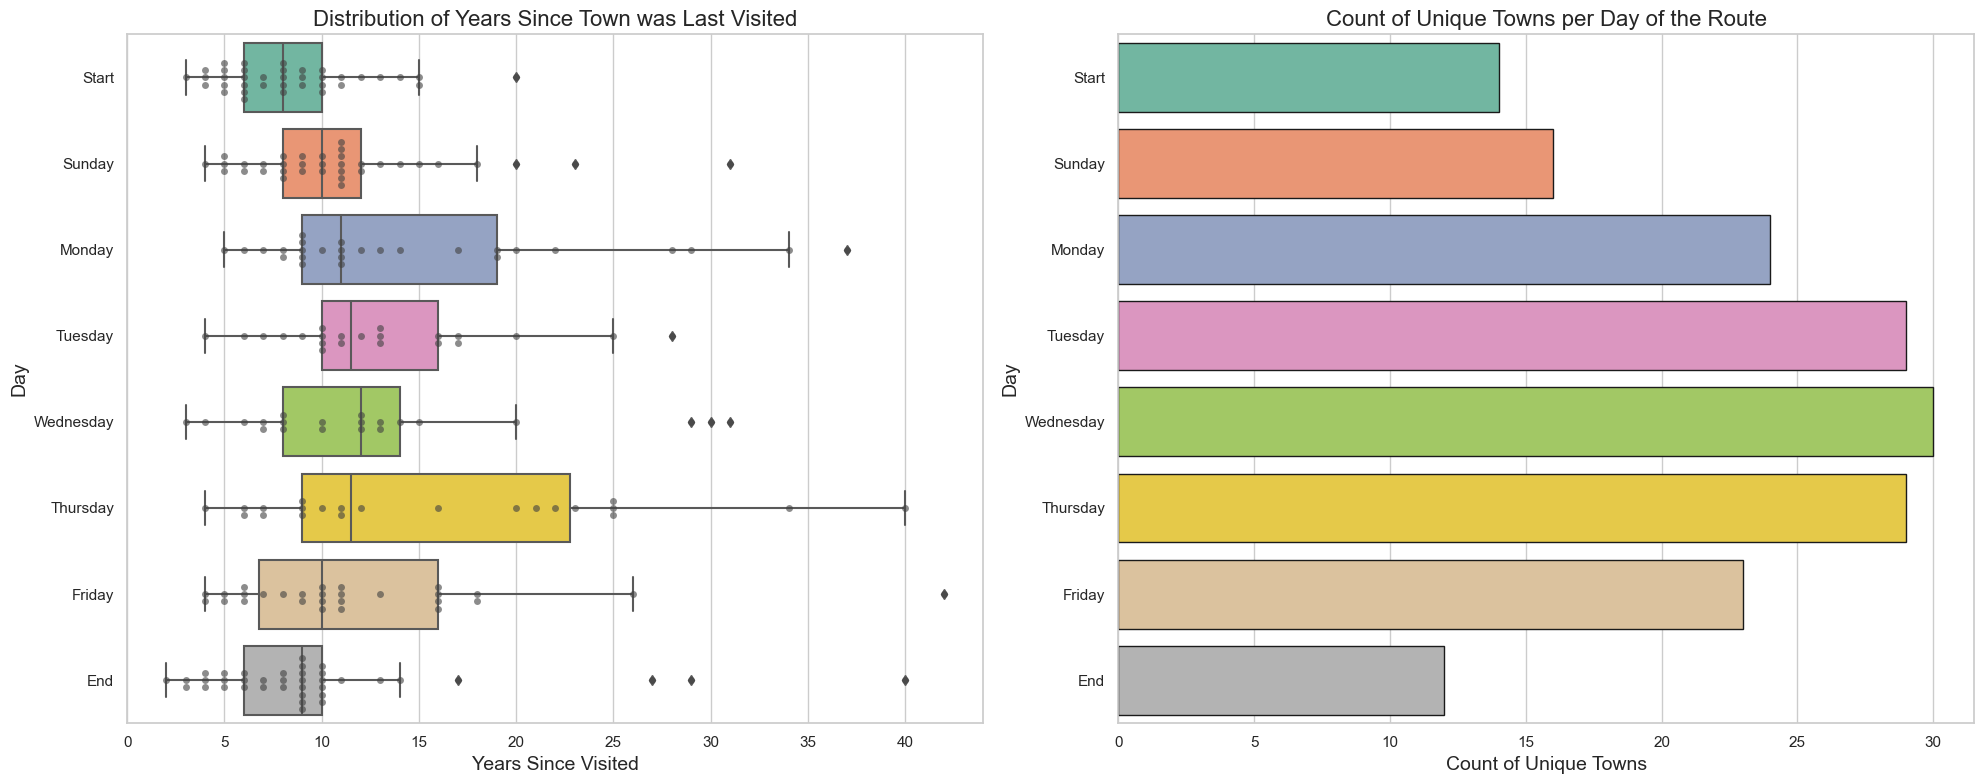

In [223]:
palette = 'Set2'
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Adjust figsize as needed

# --------------------
# First Plot
# --------------------
sns.boxplot(
    x='Years_Since_Traveled',
    y='Day',
    data=melted_df,
    palette=palette,
    orient='h',
    ax=axes[0]
)
sns.swarmplot(
    x='Years_Since_Traveled',
    y='Day',
    data=melted_df,
    color='0.25',
    alpha=0.6,
    size=5,
    ax=axes[0]
)
axes[0].set_title('Distribution of Years Since Town was Last Visited', fontsize=16)
axes[0].set_xlabel('Years Since Visited', fontsize=14)
axes[0].set_ylabel('Day', fontsize=14)

# --------------------
# Second Plot
# --------------------
unique_towns_df = pd.DataFrame({
    "Day": [
        "Start", "Sunday", "Monday", "Tuesday", 
        "Wednesday", "Thursday", "Friday", "End"
    ],
    "Unique Cities": [14, 16, 24, 29, 30, 29, 23, 12]
})

sns.barplot(data=unique_towns_df, x="Unique Cities", y='Day', ax=axes[1], palette=palette, edgecolor=".1")
axes[1].set_title('Count of Unique Towns per Day of the Route', fontsize=16)
axes[1].set_xlabel('Count of Unique Towns', fontsize=14)
axes[1].set_ylabel('Day', fontsize=14)

plt.tight_layout()
plt.show()

## Town populations

In [83]:
towns[towns.population > 500]

,element_type,osmid,name,place,population,wikipedia,geometry,county,centroid,lon,lat
1,relation,129250,adel,town,6153,"en:Adel, Iowa","POLYGON ((-94.01198 41.61467, -94.01209 41.615...",Dallas,POINT (-94.01182 41.61012),-94.011820,41.610125
2,relation,129032,agency,city,620,"en:Agency, Iowa","POLYGON ((-92.31455 40.99681, -92.31443 40.996...",Wapello,POINT (-92.30729 40.99698),-92.307291,40.996985
3,relation,128890,ainsworth,city,511,"en:Ainsworth, Iowa","POLYGON ((-91.55943 41.29440, -91.55941 41.294...",Washington,POINT (-91.55450 41.29013),-91.554502,41.290128
4,relation,128748,albia,town,3721,"en:Albia, Iowa","POLYGON ((-92.79351 41.04495, -92.79356 41.044...",Monroe,POINT (-92.80368 41.02671),-92.803680,41.026710
5,relation,129090,alburnett,city,675,"en:Alburnett, Iowa","POLYGON ((-91.61351 42.15669, -91.61356 42.143...",Linn,POINT (-91.62020 42.14841),-91.620204,42.148409
...,...,...,...,...,...,...,...,...,...,...,...
756,relation,129262,williamsburg,town,3346,"en:Williamsburg, Iowa","POLYGON ((-92.02698 41.66274, -92.02815 41.662...",Iowa,POINT (-92.01005 41.66836),-92.010051,41.668361
758,node,151405448,wilton,town,2924,"en:Wilton, Iowa",POINT (-91.01682 41.58892),None,POINT (-91.01682 41.58892),-91.016818,41.588915
759,relation,128337,windsor heights,city,5252,"en:Windsor Heights, Iowa","POLYGON ((-93.72678 41.61473, -93.72674 41.614...",Polk,POINT (-93.71280 41.60446),-93.712802,41.604460
760,relation,129061,winfield,city,1033,"en:Winfield, Iowa","POLYGON ((-91.44752 41.11749, -91.44752 41.118...",Henry,POINT (-91.43813 41.12591),-91.438133,41.125912


In [68]:
# Melt the DataFrame to long format
past_routes_long = pd.melt(
    past_routes,
    id_vars=['Year', '#', 'Miles', 'Feet of Climb', 'Riders'],
    value_vars=town_columns,
    var_name='Day',
    value_name='Town'
)

# Convert town names to lowercase
past_routes_long['Town'] = past_routes_long['Town'].str.lower()
towns['name'] = towns['name'].str.lower()
towns['lon'] = towns['centroid'].x
towns['lat'] = towns['centroid'].y

# Merge the DataFrames
merged_df = pd.merge(
    past_routes_long,
    towns[['name', 'centroid', 'lon', 'lat', 'population']],
    left_on='Town',
    right_on='name',
    how='left'
)
merged_df

,Year,#,Miles,Feet of Climb,Riders,Day,Town,name,centroid,lon,lat,population
0,1973,I,412,"12,637",130,Starting Town,sioux city,sioux city,POINT (-96.38977 42.49488),-96.389771,42.494882,85727
1,1974,II,422,"12,648","2,000",Starting Town,council bluffs,council bluffs,POINT (-95.85158 41.23686),-95.851575,41.236861,62799
2,1975,III,450,"12,573","3,000",Starting Town,hawarden,hawarden,POINT (-96.48532 42.99566),-96.485317,42.995661,2700
3,1976,IV,430,"13,737","4,000",Starting Town,sidney,sidney,POINT (-95.64688 40.74739),-95.646880,40.747387,1070
4,1977,V,400,"8,479","6,000",Starting Town,onawa,onawa,POINT (-96.09099 42.02642),-96.090985,42.026424,2906
...,...,...,...,...,...,...,...,...,...,...,...,...
403,2019,XLVII,427,"15,011","10,000",Ending Town,keokuk,keokuk,POINT (-91.40325 40.40967),-91.403250,40.409673,9900
404,2021,XLVIII,454,"11,500","10,000",Ending Town,clinton,clinton,POINT (-90.24237 41.84290),-90.242366,41.842899,24469
405,2022,XLIX,454,"11,954","10,000",Ending Town,lansing,NaN,None,NaN,NaN,NaN
406,2023,L,500,"16,549","20,000",Ending Town,davenport,davenport,POINT (-90.60532 41.55656),-90.605319,41.556563,101724


In [85]:
years = merged_df['Year'].unique()
day_order = ['Starting Town', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Ending Town']

for year in years:
    year_data = merged_df[merged_df['Year'] == year]
    # Sort by Day to maintain the route order
    year_data['Day'] = pd.Categorical(year_data['Day'], categories=day_order, ordered=True)
    year_data = year_data.sort_values('Day')

In [87]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

# Define the Haversine function to calculate distance between two lat/lon points in miles
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points on the Earth.
    
    Parameters:
    - lon1, lat1: Longitude and latitude of the first point in decimal degrees.
    - lon2, lat2: Longitude and latitude of the second point in decimal degrees.
    
    Returns:
    - Distance in miles.
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a)) 
    
    # Radius of Earth in miles. Use 3956 for miles
    r = 3956  
    
    return c * r

# Initialize a list to store all day-to-day distances
distances = []

# Get unique years from the DataFrame
years = merged_df['Year'].unique()

# Define the order of days to sort the DataFrame correctly
day_order = ['Starting Town', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Ending Town']

for year in years:
    # Filter data for the current year
    year_data = merged_df[merged_df['Year'] == year].copy()
    
    # Convert 'Day' to a categorical type with the specified order
    year_data['Day'] = pd.Categorical(year_data['Day'], categories=day_order, ordered=True)
    
    # Sort the DataFrame based on 'Day' to maintain route order
    year_data = year_data.sort_values('Day').reset_index(drop=True)
    
    # Shift the latitude and longitude to get the previous day's coordinates
    year_data['prev_lat'] = year_data['lat'].shift(1)
    year_data['prev_lon'] = year_data['lon'].shift(1)
    
    # Drop the first row as it doesn't have a previous point to compare
    year_distances = year_data.dropna(subset=['prev_lat', 'prev_lon']).copy()
    
    # Calculate the distance between consecutive towns
    year_distances['distance_miles'] = year_distances.apply(
        lambda row: haversine(row['prev_lon'], row['prev_lat'], row['lon'], row['lat']),
        axis=1
    )
    
    # Append the calculated distances to the main list
    distances.append(year_distances['distance_miles'])

# Concatenate all distances into a single Series
all_distances = pd.concat(distances, ignore_index=True)

# Analyze the distances
min_distance = all_distances.min()
max_distance = all_distances.max()
percentiles = all_distances.quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

# Display the results
print(f"Minimum day-to-day distance: {min_distance:.2f} miles")
print(f"Maximum day-to-day distance: {max_distance:.2f} miles")
print("Distance Percentiles:")
print(percentiles)

Minimum day-to-day distance: 15.62 miles
Maximum day-to-day distance: 82.87 miles
Distance Percentiles:
0.25    38.440670
0.50    46.460333
0.75    54.337962
0.90    61.495543
0.95    63.719471
0.99    72.871692
Name: distance_miles, dtype: float64


In [84]:
# day_order = ['Starting Town', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Ending Town']
# year_data = merged_df[merged_df['Year'] == 2024]
# year_data

,Year,#,Miles,Feet of Climb,Riders,Day,Town,name,centroid,lon,lat,population
50,2024,LI,434,18375,NaN,Starting Town,glenwood,glenwood,POINT (-95.74041 41.04458),-95.740407,41.044580,5073
101,2024,LI,434,18375,NaN,Sunday,red oak,red oak,POINT (-95.22483 41.01419),-95.224830,41.014187,5596
152,2024,LI,434,18375,NaN,Monday,atlantic,atlantic,POINT (-95.01383 41.39571),-95.013834,41.395706,6792
203,2024,LI,434,18375,NaN,Tuesday,winterset,winterset,POINT (-94.01883 41.33822),-94.018832,41.338224,5353
254,2024,LI,434,18375,NaN,Wednesday,knoxville,knoxville,POINT (-93.10273 41.31892),-93.102727,41.318921,7595
305,2024,LI,434,18375,NaN,Thursday,ottumwa,ottumwa,POINT (-92.41864 41.01942),-92.418637,41.019416,25529
356,2024,LI,434,18375,NaN,Friday,mount pleasant,mount pleasant,POINT (-91.54521 40.96217),-91.545212,40.962173,9274
407,2024,LI,434,18375,NaN,Ending Town,burlington,burlington,POINT (-91.12465 40.80689),-91.124651,40.806894,23982


In [73]:
unique_towns = merged_df.drop_duplicates(subset='Town')

- akron - 1542
- mapleton - 1124
- lake view - 1138
- laurens - 1249
- lake city - 1670
- guthrie - 1,593 ** This should be Guthrie Center ** 

In [74]:
unique_towns[unique_towns.name.isna()]

,Year,#,Miles,Feet of Climb,Riders,Day,Town,name,centroid,lon,lat,population
9,1982,X,523,"10,935","6,000",Starting Town,akron,NaN,None,NaN,NaN,NaN
59,1981,IX,490,"14,372","6,000",Sunday,mapleton,NaN,None,NaN,NaN,NaN
73,1995,XXIII,493,"10,674","8,000",Sunday,lake view,NaN,None,NaN,NaN,NaN
106,1977,V,400,"8,479","6,000",Monday,laurens,NaN,None,NaN,NaN,NaN
110,1981,IX,490,"14,372","6,000",Monday,lake city,NaN,None,NaN,NaN,NaN
112,1983,XI,492,"13,010","6,000",Monday,guthrie,NaN,None,NaN,NaN,NaN
154,1974,II,422,"12,648","2,000",Tuesday,camp dodge,NaN,None,NaN,NaN,NaN
226,1995,XXIII,493,"10,674","8,000",Wednesday,tama/toledo,NaN,None,NaN,NaN,NaN
260,1978,VI,440,"11,238","6,000",Thursday,mt. vernon,NaN,None,NaN,NaN,NaN
273,1991,XIX,432,"14,990","8,000",Thursday,amana,NaN,None,NaN,NaN,NaN


In [82]:
unique_towns.sort_values(by='population').head(10)

,Year,#,Miles,Feet of Climb,Riders,Day,Town,name,centroid,lon,lat,population
382,1998,XXVI,488,"11,857","10,000",Ending Town,sabula,sabula,POINT (-90.17670 42.06673),-90.176698,42.066728,506
92,2014,XLII,428,"8,057","10,000",Sunday,okoboji,okoboji,POINT (-95.13900 43.39085),-95.138998,43.390853,768
314,1981,IX,490,"14,372","6,000",Friday,keosauqua,keosauqua,POINT (-91.96040 40.73455),-91.960398,40.734546,936
3,1976,IV,430,"13,737","4,000",Starting Town,sidney,sidney,POINT (-95.64688 40.74739),-95.646880,40.747387,1070
313,1980,VIII,468,"11,912","6,000",Friday,elkader,elkader,POINT (-91.40291 42.85741),-91.402905,42.857407,1209
121,1992,XX,494,"13,455","8,000",Monday,bedford,bedford,POINT (-94.71996 40.66808),-94.719957,40.668080,1508
103,1974,II,422,"12,648","2,000",Monday,guthrie center,guthrie center,POINT (-94.49903 41.67792),-94.499030,41.677921,1593
196,2016,XLIV,420,"16,644","10,000",Tuesday,leon,leon,POINT (-93.75452 40.74075),-93.754523,40.740751,1822
150,2022,XLIX,454,"11,954","10,000",Monday,pocahontas,pocahontas,POINT (-94.66620 42.73701),-94.666202,42.737010,1867
257,1975,III,450,"12,573","3,000",Thursday,sigourney,sigourney,POINT (-92.20444 41.33402),-92.204442,41.334024,2004


<Axes: xlabel='population', ylabel='Count'>

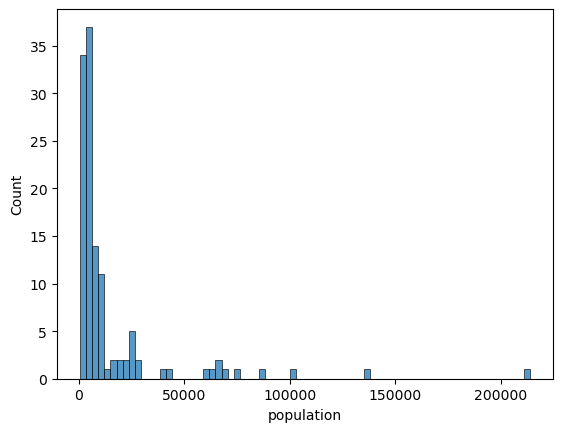

In [79]:
import seaborn as sns

sns.histplot(data=unique_towns, x="population")

<Axes: xlabel='population'>

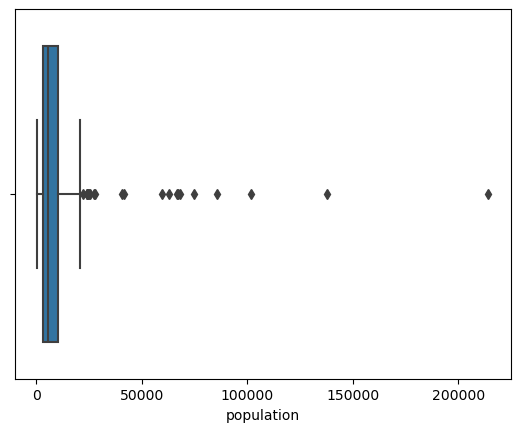

In [80]:
sns.boxplot(data=unique_towns, x="population")